In [1]:
import pandas as pd
import os

os.chdir('C:\\Users\\Shubham\\Downloads\\datasets\\telco churn')
df=pd.read_csv("telco churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [2]:
df.isnull().sum().sum()

0

In [3]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

# EDA Using Visualization 

In [4]:
import seaborn as sns

<AxesSubplot:xlabel='Contract', ylabel='count'>

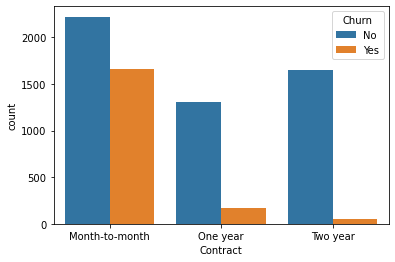

In [5]:
sns.countplot(x=df['Contract'],hue=df['Churn'],data = df)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

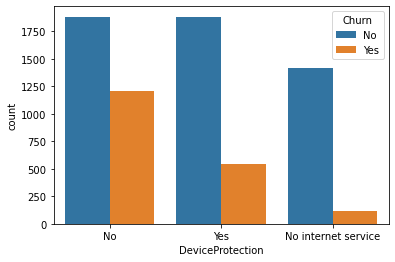

In [7]:
sns.countplot(x=df['DeviceProtection'],hue=df['Churn'],data = df)

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

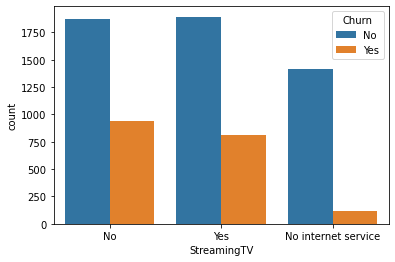

In [8]:
sns.countplot(x=df['StreamingTV'],hue=df['Churn'],data = df)

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

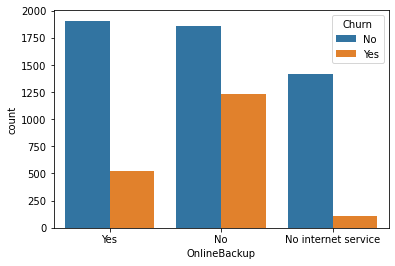

In [9]:
sns.countplot(x=df['OnlineBackup'],hue=df['Churn'],data = df)

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

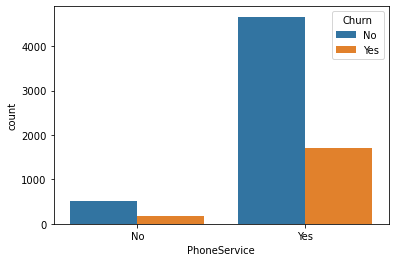

In [10]:
sns.countplot(x=df['PhoneService'],hue=df['Churn'],data = df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

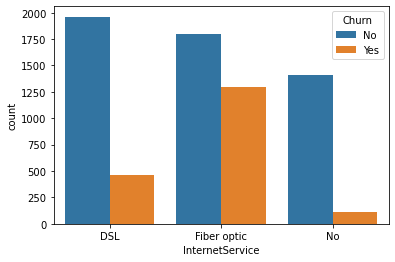

In [11]:
sns.countplot(x=df['InternetService'],hue=df['Churn'],data = df)

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

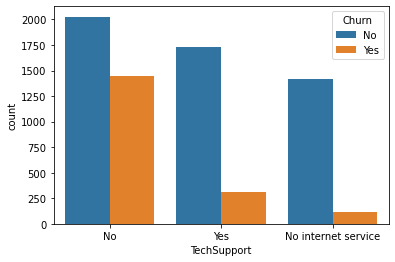

In [12]:
sns.countplot(x=df['TechSupport'],hue=df['Churn'],data = df)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

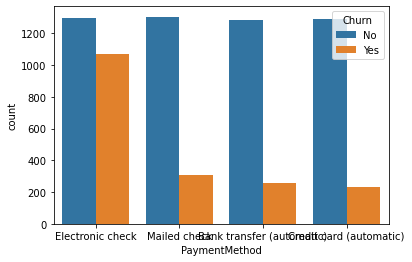

In [13]:
sns.countplot(x=df['PaymentMethod'],hue=df['Churn'],data = df)

# Feature Engineering

In [14]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [15]:
df=df.rename(columns={'gender':'Gender','customerID':'Customer_Id','SeniorCitizen':'Senior_Citizen','tenure':'Tenure'})

In [16]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

In [17]:
df['Partner']=pd.get_dummies(df['Partner'])

In [18]:
df['Dependents']=pd.get_dummies(df['Dependents'])

In [19]:
df['PhoneService']=pd.get_dummies(df['PhoneService'])

In [20]:
df['MultipleLines']=df['MultipleLines'].map({'Yes':0,'No':1,'No phone service':2})

In [21]:
df['InternetService']=df['InternetService'].map({'Fiber optic':0,'DSL':1,'No':2})

In [22]:
df['OnlineSecurity']=df['OnlineSecurity'].map({'Yes':0,'No':1,'No internet service':2})

In [23]:
df['OnlineBackup']=df['OnlineBackup'].map({'Yes':0,'No':1,'No internet service':2})

In [24]:
df['DeviceProtection']=df['DeviceProtection'].map({'Yes':0,'No':1,'No internet service':2})

In [25]:
df['TechSupport']=df['TechSupport'].map({'Yes':0,'No':1,'No internet service':2})

In [26]:
df['StreamingTV']=df['StreamingTV'].map({'Yes':0,'No':1,'No internet service':2})

In [27]:
df['StreamingMovies']=df['StreamingMovies'].map({'Yes':0,'No':1,'No internet service':2})

In [28]:
df['Contract']=df['Contract'].map({'Month-to-month':0,'Two year':1,'One year':2})

In [29]:
df['PaymentMethod']=df['PaymentMethod'].map({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})

In [30]:
df['Churn']=pd.get_dummies(df['Churn'])

In [31]:
df['PaperlessBilling']=pd.get_dummies(df['PaperlessBilling'])

In [32]:
df['Partner']=df['Partner'].astype(int)

In [33]:
df['Dependents']=df['Dependents'].astype(int)

In [34]:
df['MonthlyCharges']=df['MonthlyCharges'].astype(int)

In [35]:
df['PhoneService']=df['PhoneService'].astype(int)

In [36]:
df['PaperlessBilling']=df['PaperlessBilling'].astype(int)

In [37]:
df['Churn']=df['Churn'].astype(int)

In [38]:
df['TotalCharges']=df['TotalCharges'].str.strip('')

In [39]:
df.drop('Customer_Id',axis=1,inplace=True)

In [40]:
df

,Gender,Senior_Citizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,1,1,2,1,1,0,1,1,1,1,0,0,0,29,29.85,1
1,0,0,1,1,34,0,1,1,0,1,0,1,1,1,2,1,1,56,1889.5,1
2,0,0,1,1,2,0,1,1,0,0,1,1,1,1,0,0,1,53,108.15,0
3,0,0,1,1,45,1,2,1,0,1,0,0,1,1,2,1,2,42,1840.75,1
4,1,0,1,1,2,0,1,0,1,1,1,1,1,1,0,0,0,70,151.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,24,0,0,1,0,1,0,0,0,0,2,0,1,84,1990.5,1
7039,1,0,0,0,72,0,0,0,1,0,0,1,0,0,2,0,3,103,7362.9,1
7040,1,0,0,0,11,1,2,1,0,1,1,1,1,1,0,0,0,29,346.45,1
7041,0,1,0,1,4,0,0,0,1,1,1,1,1,1,0,0,1,74,306.6,0


<AxesSubplot:>

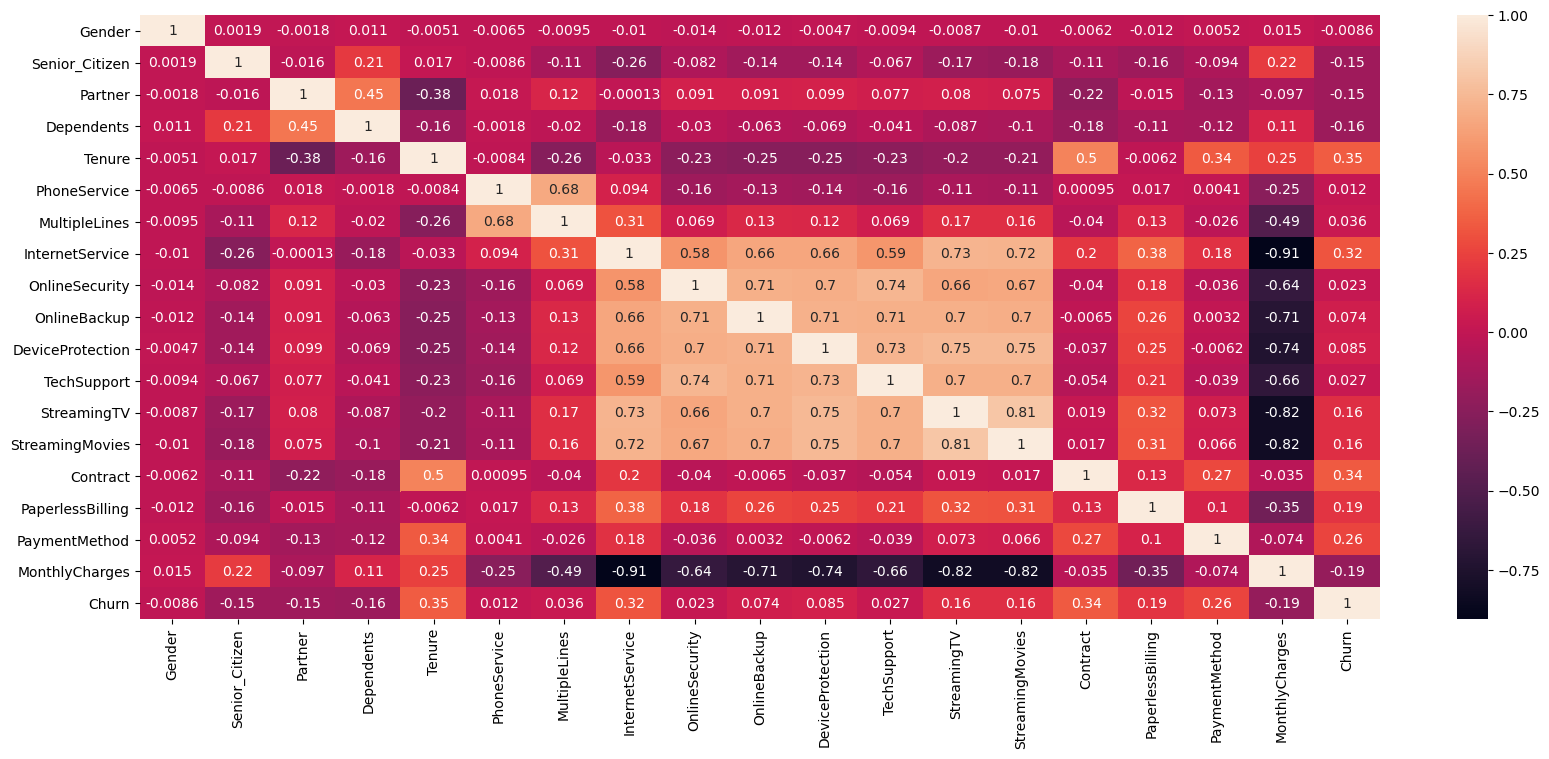

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8),dpi=100)
sns.heatmap(df.corr(),annot=True)

So here is a interesting problem and that is column is showing zero null values but there are 11 null values and those are types in form of ' ' . 
So That gave a bit of problem first to find while doing type casting.
I have dropped those rows.

In [42]:
df1=df[df['TotalCharges']==' ']

In [43]:
df1

,Gender,Senior_Citizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,1,0,0,0,0,1,2,1,0,1,0,0,0,1,1,0,2,52,,1
753,0,0,1,0,0,0,1,2,2,2,2,2,2,2,1,1,1,20,,1
936,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,1,80,,1
1082,0,0,0,0,0,0,0,2,2,2,2,2,2,2,1,1,1,25,,1
1340,1,0,0,0,0,1,2,1,0,0,0,0,0,1,1,1,3,56,,1
3331,0,0,0,0,0,0,1,2,2,2,2,2,2,2,1,1,1,19,,1
3826,0,0,0,0,0,0,0,2,2,2,2,2,2,2,1,1,1,25,,1
4380,1,0,0,0,0,0,1,2,2,2,2,2,2,2,1,1,1,20,,1
5218,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,0,1,19,,1
6670,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,73,,1


In [44]:
df.drop(df[df['TotalCharges']== ' '].index,inplace=True)

In [45]:
df

,Gender,Senior_Citizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,1,1,2,1,1,0,1,1,1,1,0,0,0,29,29.85,1
1,0,0,1,1,34,0,1,1,0,1,0,1,1,1,2,1,1,56,1889.5,1
2,0,0,1,1,2,0,1,1,0,0,1,1,1,1,0,0,1,53,108.15,0
3,0,0,1,1,45,1,2,1,0,1,0,0,1,1,2,1,2,42,1840.75,1
4,1,0,1,1,2,0,1,0,1,1,1,1,1,1,0,0,0,70,151.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,24,0,0,1,0,1,0,0,0,0,2,0,1,84,1990.5,1
7039,1,0,0,0,72,0,0,0,1,0,0,1,0,0,2,0,3,103,7362.9,1
7040,1,0,0,0,11,1,2,1,0,1,1,1,1,1,0,0,0,29,346.45,1
7041,0,1,0,1,4,0,0,0,1,1,1,1,1,1,0,0,1,74,306.6,0


#  Feature Importance

In [46]:
features = df.drop('Churn',axis=1)
target = df['Churn']

In [47]:
from sklearn.feature_selection import mutual_info_classif
imp=mutual_info_classif(features,target)
feature_importance=pd.Series(imp,df.columns[0:len(df.columns)-1])
feature_importance

Gender              0.000000
Senior_Citizen      0.013761
Partner             0.010600
Dependents          0.013390
Tenure              0.065460
PhoneService        0.000000
MultipleLines       0.004955
InternetService     0.054996
OnlineSecurity      0.071314
OnlineBackup        0.054375
DeviceProtection    0.036522
TechSupport         0.069101
StreamingTV         0.028980
StreamingMovies     0.038101
Contract            0.102616
PaperlessBilling    0.015235
PaymentMethod       0.039588
MonthlyCharges      0.049710
TotalCharges        0.044207
dtype: float64

<AxesSubplot:>

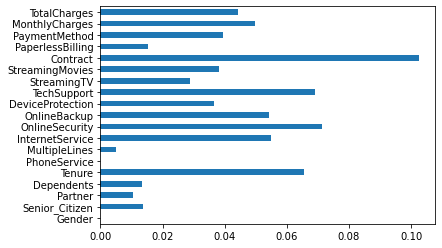

In [48]:
feature_importance.plot(kind='barh')

# Model Building

In [49]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# decision Tree

In [50]:
x=df.drop('Churn',axis=1)

In [51]:
y=df['Churn']

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [53]:
dec_tree_op=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [54]:
dec_tree_op.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [55]:
y_pred=dec_tree_op.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [56]:
dec_tree_op.score(x_test,y_test)

0.7874911158493249

In [57]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.59      0.51      0.54       352
           1       0.84      0.88      0.86      1055

    accuracy                           0.79      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



As you can see that the accuracy is quite low, and as it is an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
So, we need to check recall, precision & f1 score for the minority class, and it is quite evident that the precision, recall & f1 score is too low for Class 0, i.e. not churned customers.
Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [79]:
from imblearn.combine import SMOTEENN

In [80]:
from imblearn.over_sampling import SMOTE

In [86]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(x,y)

In [82]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [83]:
dec_tree_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [87]:
dec_tree_smote.fit(xr_train,yr_train)
yr_predict = dec_tree_smote.predict(xr_test)
dec_tree_smote_score = dec_tree_smote.score(xr_test, yr_test)
print(dec_tree_smote_score)
print(metrics.classification_report(yr_test, yr_predict))

0.7909002904162633
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1027
           1       0.83      0.74      0.78      1039

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



In [78]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[900 161]
 [265 740]]


# Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [90]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [91]:
y_pred=model_rf.predict(x_test)

In [92]:
model_rf.score(x_test,y_test)

0.8052594171997157

In [93]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.64      0.49      0.56       352
           1       0.84      0.91      0.88      1055

    accuracy                           0.81      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.79      0.81      0.80      1407



Sampling

In [98]:
sm = SMOTE()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [99]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [100]:
forest_model_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
forest_model_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [102]:
yr_predict1 = forest_model_smote.predict(xr_test1)
forest_model_score_smote = forest_model_smote.score(xr_test1, yr_test1)

In [103]:
print(forest_model_score_smote)

0.8044530493707648


In [104]:
print(metrics.classification_report(yr_test1, yr_predict1))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1027
           1       0.84      0.75      0.79      1039

    accuracy                           0.80      2066
   macro avg       0.81      0.80      0.80      2066
weighted avg       0.81      0.80      0.80      2066



In [105]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[879 148]
 [256 783]]


# PCA

In [106]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [107]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [108]:
model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [109]:
yr_predict_pca = model.predict(xr_test_pca)

In [110]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)
print(model_score_r_pca)

0.6176185866408519


In [111]:
print(metrics.classification_report(yr_test1, yr_predict_pca))

              precision    recall  f1-score   support

           0       0.61      0.65      0.63      1027
           1       0.63      0.59      0.61      1039

    accuracy                           0.62      2066
   macro avg       0.62      0.62      0.62      2066
weighted avg       0.62      0.62      0.62      2066



Random forest has a better accuracy